# Exploratory Data Analysis

## 1. Importing necessary libaries and packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Load the CSV dataset
df = pd.read_csv('../inputs/telco_data.csv')

In [3]:
# Load Second Copy for Data Cleaning and 
df2 = df.copy()

In [4]:
# Display the first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,ReasonForLeaving,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,NaN,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Not enough good shows or movies to watch,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Too expensive for me,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Check the data types of each column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
ReasonForLeaving     object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Check for missing values
df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
ReasonForLeaving    5174
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

## Plot the count of churned and non-churned customers

Text(0.5, 1.0, 'Churned vs Non-Churned Customers')

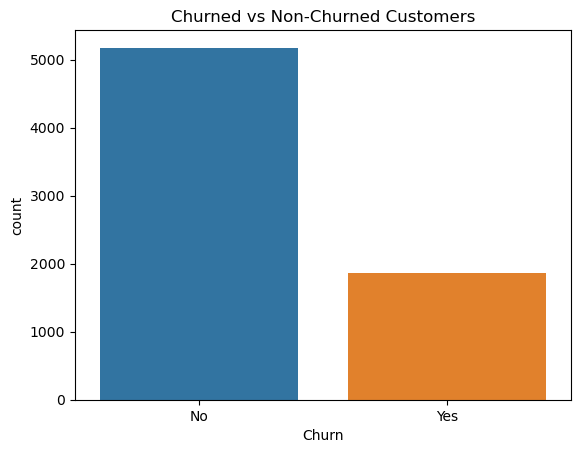

In [7]:
sns.countplot(x='Churn', data=df)
plt.title('Churned vs Non-Churned Customers')

The majority of customers have not churned; there is a large class imbalance we will have to deal with. 

## Explore churn rate by gender

Text(0.5, 1.0, 'Churn Rate by Gender')

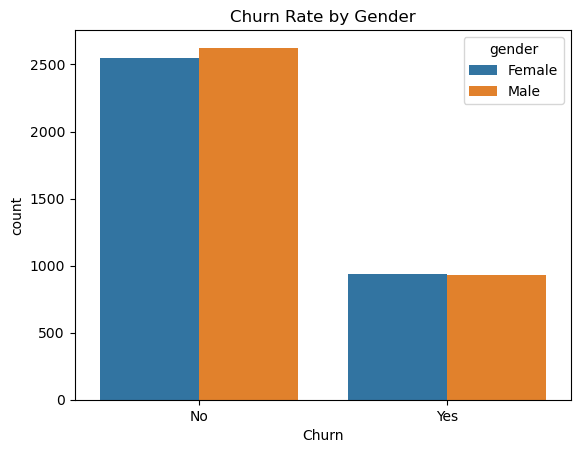

In [8]:
sns.countplot(x='Churn', hue='gender', data=df)
plt.title('Churn Rate by Gender')

The churn rate does not seem to disproportionally effect a given gender. They seem almost equiproportional. 

# Explore churn rate by internet service type

Text(0.5, 1.0, 'Churn Rate by Internet Service')

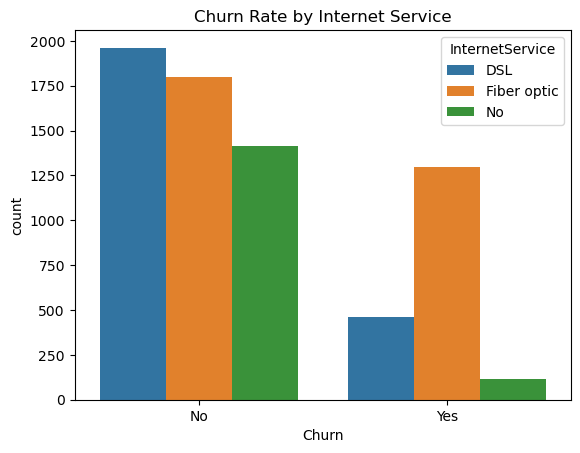

In [9]:
sns.countplot(x='Churn', hue='InternetService', data=df)
plt.title('Churn Rate by Internet Service')

It seems like Fiber optic may be causing customers problems, while DSL is rather popular (suprising because it is thought to be slower than Fiber Optic... but cheaper). 

# Explore churn rate by contract type

Text(0.5, 1.0, 'Churn Rate by Contract Type')

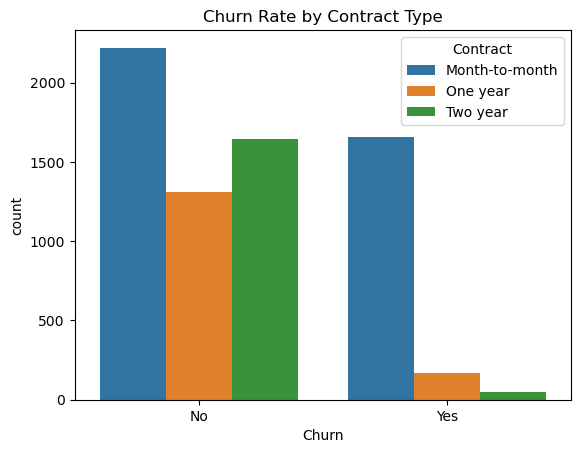

In [10]:
sns.countplot(x='Churn', hue='Contract', data=df)
plt.title('Churn Rate by Contract Type')

Seems like month-to-month contracts lead to quarterly churn.. giving them them the option to choose... seems to lead to people turning over quarterly at a higher rate (could be a fundamental problem with the value proposition of the business or high competition).

# Calculate the churn rate

In [11]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Rate:\n", churn_rate)

Churn Rate:
 No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


75% of people in data churn. Will have to deal with lopsided data before implementing a machine learning model.

# Top reasons for churning

In [12]:
top_reasons = df['ReasonForLeaving'].value_counts().nlargest(20)
print("Top Reasons for Churning:\n", top_reasons)

Top Reasons for Churning:
 Not enough good shows or movies to watch     292
Poor customer service                        290
My favorite show is not available anymore    270
Hard to use                                  259
Switching to another cable provider          254
Too expensive for me                         253
Not enough time to watch                     251
Name: ReasonForLeaving, dtype: int64


Expense, poor customer service, difficulty of use, lifestyle choices, and lack of continuous content are major factors contributing to churn.

# Customer segmentation based on tenure with churn rate

Customer Segmentation by Tenure:
 37+      3001
0-12     2175
13-24    1024
25-36     832
Name: TenureSegment, dtype: int64
Churn Rates by Tenure Segment:
 TenureSegment
0-12     47.678161
13-24    28.710938
25-36    21.634615
37+      11.929357
Name: Churn, dtype: float64


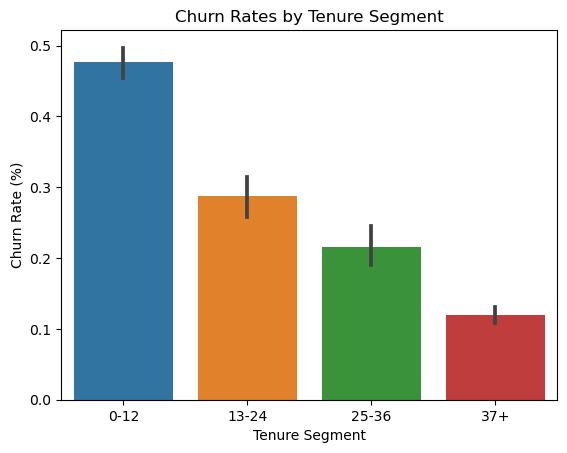

In [13]:
# Convert 'Churn' column to numeric format
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Calculate churn rates for each tenure segment
df['TenureSegment'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, df['tenure'].max()], labels=['0-12', '13-24', '25-36', '37+'])
segment_counts = df['TenureSegment'].value_counts()
churn_rates = df.groupby('TenureSegment')['Churn'].mean() * 100
print("Customer Segmentation by Tenure:\n", segment_counts)
print("Churn Rates by Tenure Segment:\n", churn_rates)

# Visualize churn rates by tenure segment
sns.barplot(x='TenureSegment', y='Churn', data=df)
plt.title('Churn Rates by Tenure Segment')
plt.xlabel('Tenure Segment')
plt.ylabel('Churn Rate (%)')
plt.show()

Really matches what one would expect. The longer the tenure, the less likelihood of churning. Targeting short-timers might be a good bet. And nice find, churn rate appears significantly higher than the industry.

#### According to Statista (https://www.statista.com/statistics/816735/customer-churn-rate-by-industry-us/), the customer churn rate for the telecom industry is 21%.

# Top reason for churning within each tenure segment

In [14]:
df['TenureSegment'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, df['tenure'].max()], labels=['0-12', '13-24', '25-36', '37+'])
segment_counts = df['TenureSegment'].value_counts()
churn_rates = df.groupby('TenureSegment')['Churn'].mean() * 100
print("Customer Segmentation by Tenure:\n", segment_counts)
print("Churn Rates by Tenure Segment:\n", churn_rates)

# Find top reason for churning within each segment
top_reasons = df.groupby('TenureSegment')['ReasonForLeaving'].apply(lambda x: x.value_counts().idxmax())
print("Top Reasons for Churning by Tenure Segment:\n", top_reasons)

Customer Segmentation by Tenure:
 37+      3001
0-12     2175
13-24    1024
25-36     832
Name: TenureSegment, dtype: int64
Churn Rates by Tenure Segment:
 TenureSegment
0-12     47.678161
13-24    28.710938
25-36    21.634615
37+      11.929357
Name: Churn, dtype: float64
Top Reasons for Churning by Tenure Segment:
 TenureSegment
0-12      Not enough good shows or movies to watch
13-24                        Poor customer service
25-36    My favorite show is not available anymore
37+      My favorite show is not available anymore
Name: ReasonForLeaving, dtype: object


I think the reasoning is as expected given what Disney is going through right now (month to month drops in consumers)... it is an issue of maintaining a continous inflow of high quality content through licensing in a saturated market ripe with competitive players. (everyone is now launching ad-supported tiers like netflix.. something to think about...lower prices mean..more likely to keep service). Also, it is interesting that price isn't up there with top problems consumers face.

# Explore churn rate by senior citizen status

Text(0.5, 1.0, 'Churn Rate by Senior Citizen Status')

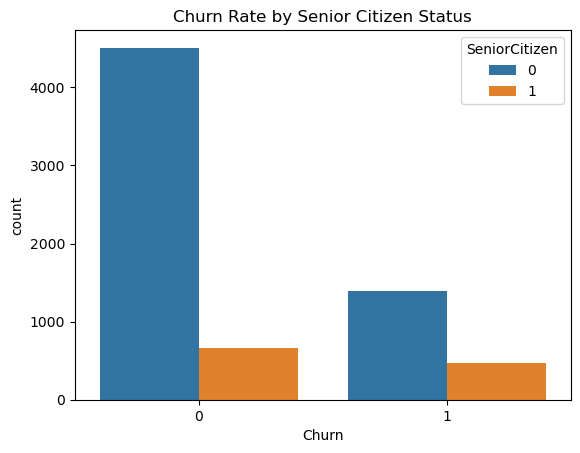

In [15]:
sns.countplot(x='Churn', hue='SeniorCitizen', data=df)
plt.title('Churn Rate by Senior Citizen Status')

As expected, most people who are churning are not older.. but most customers are not older in general... seems like being older is linked with churning..maybe more so than being younger in this context

# Investigate the relationship between monthly charges and churn

Text(0.5, 1.0, 'Relationship between Monthly Charges and Churn')

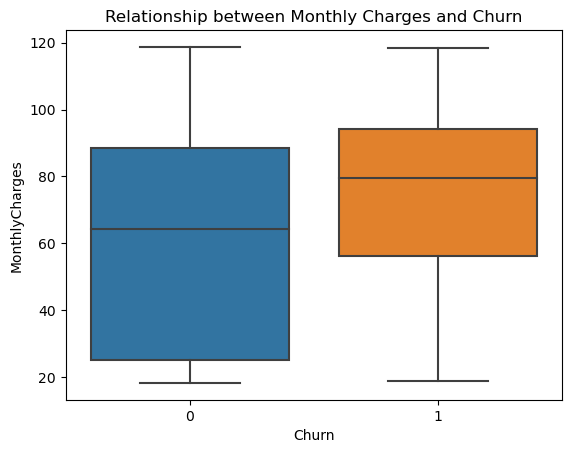

In [16]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Relationship between Monthly Charges and Churn')

May not be statistically significant... although I expect a correlation with price.

# Compare churn rate between customers with and without phone service

Text(0.5, 1.0, 'Churn Rate by Phone Service')

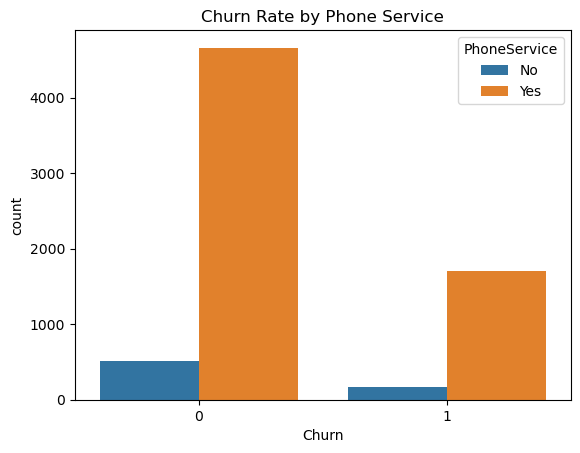

In [17]:
sns.countplot(x='Churn', hue='PhoneService', data=df)
plt.title('Churn Rate by Phone Service')

Hard to parse a relationship here. Seems like most people get the phone service.

# Analyze the distribution of payment methods

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

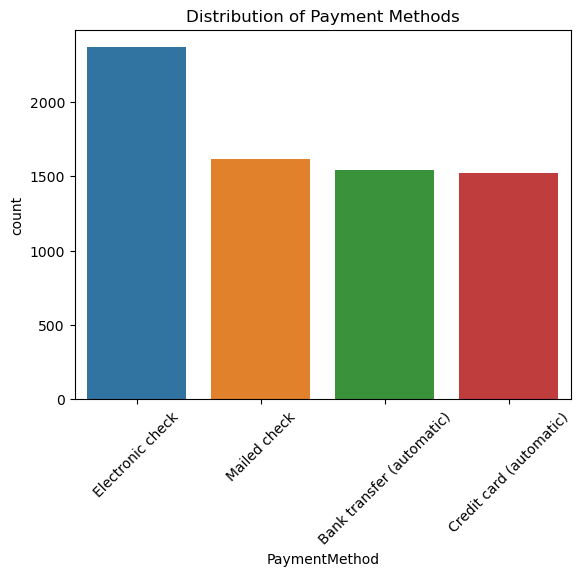

In [18]:
sns.countplot(x='PaymentMethod', data=df)
plt.title('Distribution of Payment Methods')
plt.xticks(rotation=45)

Interesting electronic check is so popular... strange

# Calculate churn rate for customers with and without phone service

In [19]:
churn_rate_phone_service = df[df['PhoneService'] == 'Yes']['Churn'].value_counts(normalize=True) * 100
churn_rate_no_phone_service = df[df['PhoneService'] == 'No']['Churn'].value_counts(normalize=True) * 100
print("Churn Rate with Phone Service:\n", churn_rate_phone_service)
print("Churn Rate without Phone Service:\n", churn_rate_no_phone_service)

Churn Rate with Phone Service:
 0    73.290363
1    26.709637
Name: Churn, dtype: float64
Churn Rate without Phone Service:
 0    75.073314
1    24.926686
Name: Churn, dtype: float64


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


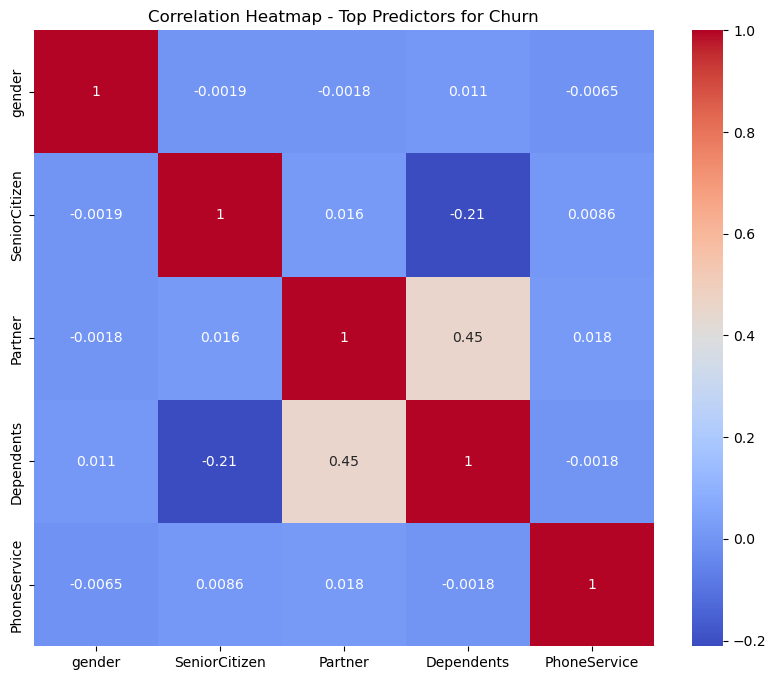

In [20]:
# Convert 'Churn' column to numeric format
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Select the columns to analyze for churn prediction
predictor_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                     'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                     'ReasonForLeaving', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                     'MonthlyCharges', 'TotalCharges']

# Calculate the correlation between predictors and churn
correlations = {}
for column in predictor_columns:
    if df[column].dtype == 'object':
        # Convert categorical variables to numerical using label encoding
        df[column] = df[column].astype('category').cat.codes
    correlations[column] = np.corrcoef(df[column], df['Churn'])[0, 1]

# Sort the results by correlation coefficient in descending order
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Display the top predictors for churn
top_predictors = dict(sorted_correlations[:5])
print("Top Predictors for Churn:\n", top_predictors)

# Create a correlation matrix
corr_matrix = df[list(top_predictors.keys())].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Top Predictors for Churn')
plt.show()


# Data Preprocessing and Feature Engineering

In [21]:
## Inspect df Copy for Data Feature Engineering
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  ReasonForLeaving  1869 non-null   object 
 16  Contract          7043 non-null   object 


In [22]:
## Handle Missing Values
df2 = df2.drop(['ReasonForLeaving', 'customerID'], axis=1)

I dropped 'customerID' because it is a unique identifier that does not provide any useful predictive information, and I removed 'ReasonForLeaving' because ~73% of its values are missing.

In [23]:
## Assess Dataframe Again
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [24]:
## Convert TotalCharges into a float
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'], errors = 'coerce')

In [25]:
## Convert Churn into 1s and 0s
df2['Churn'] = (df2['Churn'] == 'Yes').astype(int)
df2['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [26]:
## One-Hot Encoding for Nominal Categorical Variables
from sklearn.preprocessing import OneHotEncoder

# Convert Partner and SeniorCitizen into a Nominal Categorical Variable
df2['SeniorCitizen'] = df2['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})


# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Nominal Variables to Select
nominal_cols = ['gender', 
                'SeniorCitizen', 
                'Partner', 
                'Dependents',
                'PhoneService',
                'InternetService',
                'MultipleLines',
                'OnlineSecurity',
                'OnlineBackup',
                'DeviceProtection',
                'TechSupport',
                'StreamingTV',
                'StreamingMovies',
                'PaperlessBilling',
                'PaymentMethod' 
               ]

# Fit and transform the data using the encoder
one_hot_encoded = encoder.fit_transform(df2[nominal_cols])

# Convert the ecoded data to a Dataframe
one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(nominal_cols))

# Concatenate the encoded DataFrame with the original DataFrame
df2 = pd.concat([df2, one_hot_encoded_df], axis=1)
df2 = df2.drop(columns=nominal_cols, axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   Contract                                 7043 non-null   object 
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7043 non-null   int64  
 5   gender_Female                            7043 non-null   float64
 6   gender_Male                              7043 non-null   float64
 7   SeniorCitizen_No                         7043 non-null   float64
 8   SeniorCitizen_Yes                        7043 non-null   float64
 9   Partner_No                               7043 non-null   float64
 10  Partner_Yes                              7043 no

In [27]:
## View Contract Column
df2['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder2 = LabelEncoder()

# Reshape the feature into a 2D array
reshaped_feature = df2['Contract'].values.reshape(-1, 1)

# Fit and transform the feature using the encoder
label_encoded_feature = encoder2.fit_transform(reshaped_feature)

# Replace the original feature with the encoded feature
df2['Contract_encoded'] = label_encoded_feature

# Check DataFrame 2
df2 = df2.drop(columns='Contract', axis = 1)



/Users/dylanjuarez/opt/anaconda3/envs/Dyl_Python_Env/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
df2['Contract_encoded'].value_counts()

0    3875
2    1695
1    1473
Name: Contract_encoded, dtype: int64

In [29]:
## Deal with Tenure


Next Steps
1. Deal with Tenure Column. Should we categorize like Franklin did, and then, label encode it given that there is likely an ordinal relationship there or should we leave it as numeric column and assess the logistic regressions performance after checking assumptions.
2. Check one-hot-encoding and label-encoding, does everyone agree with what I did? Typically, you use one-hot encoding when the categorical variable is nominal (unordered) and does not have a natural ordering or hierarchy between categories, and ordinal/label encoding when the categorical variable is ordinal, and the categories have an ordered relationship but are not evenly spaced.
3. Handle Outliers/Feature scaling/apply transformations if relationship is non-linear. 
4. Deal with multicollinearity
5. Deal with imbalanced class 
6. Feature selection